
# Project: Investigate a Dataset (No-show appointments)

![RedCross](https://cdn.icon-icons.com/icons2/807/PNG/512/hospital-1_icon-icons.com_66068.png)
[(Font: icon-icons)](https://icon-icons.com/pt/icone/hospital-1-medicina-farmacia-cruz/66068)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Lots of patients in Brazil miss their medical appointments for several reasons. People schedule the appointment and just forget they did it, sometimes they don't show up for laziness, others fear of some exam or results. 

> In this project we will be analysing data from medical appointments in Brazil in particular to find trends on patients who shows up or don't for their medical appointment.

>We'll be asking questions like the age of patients who miss more appointments, if receiving SMS decrease the chance for patients to miss apointments, which neighborhood take medical appointments more serious amoung others.

>Our Dataset contains the following data

** Data Dictionary ** [Font: Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)
* PatientId - Identification of a patient 
* AppointmentID - Identification of each appointment 
* Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 
* ScheduledDay = The day someone called or registered the appointment, this is before appointment of course. 
* AppointmentDay = The day of the actuall appointment, when they have to visit the doctor. 
* Age = How old is the patient. 
* Neighbourhood = Where the appointment takes place. 
* Scholarship = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia 
* Hipertension = True or False 
* Diabetes = True or False 
* Alcoholism = True or False 
* Handcap = True or False 
* SMS_received = 1 or more messages sent to the patient. No-show = True or False.
* No-show =  it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# matplot magic line
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# read and show few lines of the file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#looking ate column/lines size
df.shape

(110527, 14)

In [4]:
#looking if the dataset have nullvalues and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#renaming No-show to keep a "_" pattern
df.rename({'No-show' : 'No_show'}, axis = 1, inplace = True)

In [6]:
#checking for duplicates
sum(df.duplicated())

0

**Analysing columns** 

Analysing the columns we can see there is no missing data nor duplicates.

There are some columns that are useless for the analysis.
* PatientId
* AppointmentID
* ScheduledDay

There are some columns we should change the data type.
* AppointmentDay

In [7]:
#Droping columns we won't use
df.drop(columns = ['PatientId','AppointmentID','ScheduledDay'], axis = 1, inplace = True)

In [8]:
#transforming appointmentday in date format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Since we have the date of the appointment. It is important to know if the day is a weekend day.

In [9]:
#creating a column to know if it is week day or weekend day
df['is_weekend'] = ((pd.DatetimeIndex(df.AppointmentDay).dayofweek) // 5 == 1).astype(int)

In [10]:
#seeing how many unique values the columns have
df.nunique()

Gender              2
AppointmentDay     27
Age               104
Neighbourhood      81
Scholarship         2
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No_show             2
is_weekend          2
dtype: int64

In [11]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

By Kaggle data dictionary, Handcap should be True or False, so let's assume 0 for false and true for the rest.

In [12]:
#Transforming 2,3,4 data in 1
df['Handcap'] = df['Handcap'].map({0 : 0, 1 : 1, 2:  1, 3 : 1, 4 : 1})

We can noticed age has 104 unique values, what it is not a common thing. 

In [13]:
df.groupby('Age')['Age'].count()

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

Since Age -1 doesn't exist we'll drop that line

In [14]:
#getting rid of -1 age line
df = df.query("Age != -1")

In [15]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,is_weekend
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis

> Let's create masks to facilitate grab rows where patients show the appointment and patients who doesn't show.



In [16]:
#Creating a dataframe for people who shows in the appointment and people who doesn't show
show = df.No_show == "No"
no_show = df.No_show == "Yes"

In [17]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,is_weekend
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.000353
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.018781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


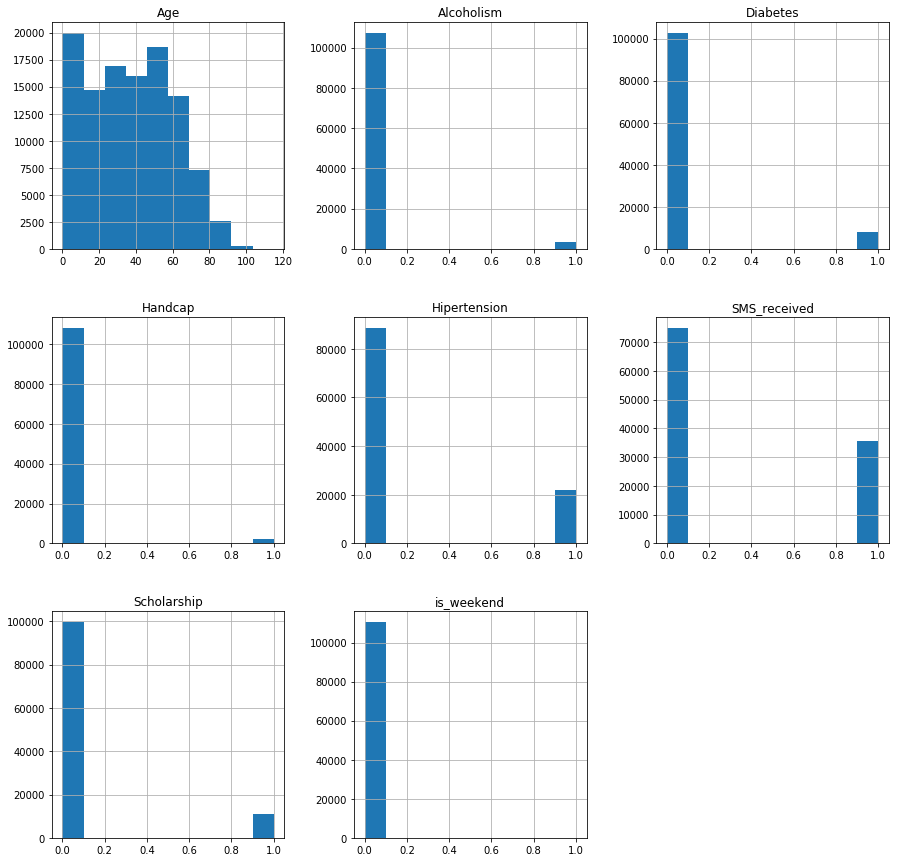

In [18]:
#plotting histograms
df.hist(figsize=[15,15]);

### Research Question 1 (Which age are more inclined to miss appointments)

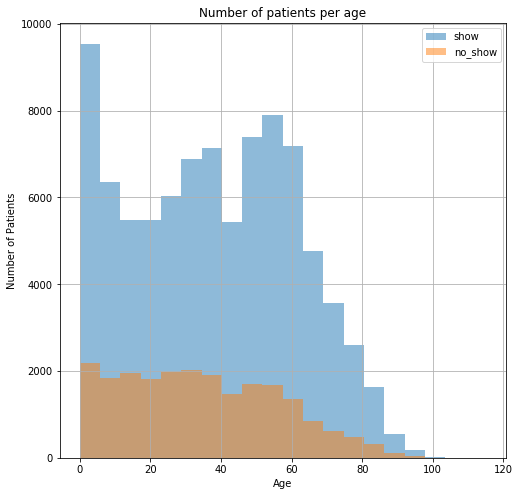

In [19]:
#plotting age vs Show/No-show
df[show].Age.hist(figsize = [8, 8], alpha = 0.5, bins = 20, label = "show");
df[no_show].Age.hist(figsize = [8, 8], alpha = 0.5, bins = 20, label = "no_show");
plt.legend();
plt.title("Number of patients per age");
plt.xlabel("Age");
plt.ylabel("Number of Patients");

By the graph above we can see that patients with more than 60 years are less inclined to miss their medical appointments, but we should see the proportion of no showing patients to confirm that.

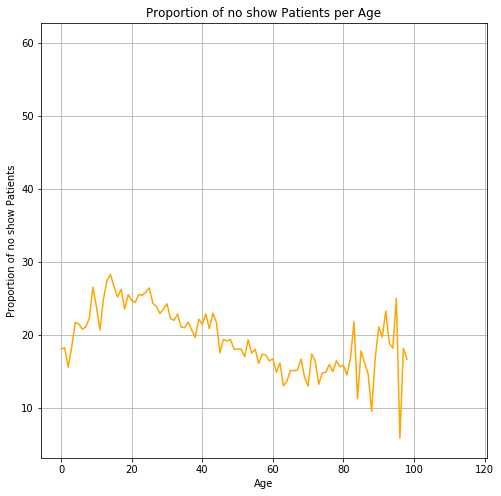

In [20]:
#Ploting percentage
no_show_patients = df[no_show].Age.value_counts()
total = df.Age.value_counts()
no_show_proportion = (no_show_patients/total)*100
no_show_proportion.plot(figsize = [8, 8], color = 'orange', grid = True);
plt.title("Proportion of no show Patients per Age");
plt.xlabel("Age");
plt.ylabel("Proportion of no show Patients");

By the proportion of no show patients per age we could notice that patients miss less appointments in early ages and after 45 years.

### Research Question 2  (Which Neighbourhood are more inclined to miss appointments)

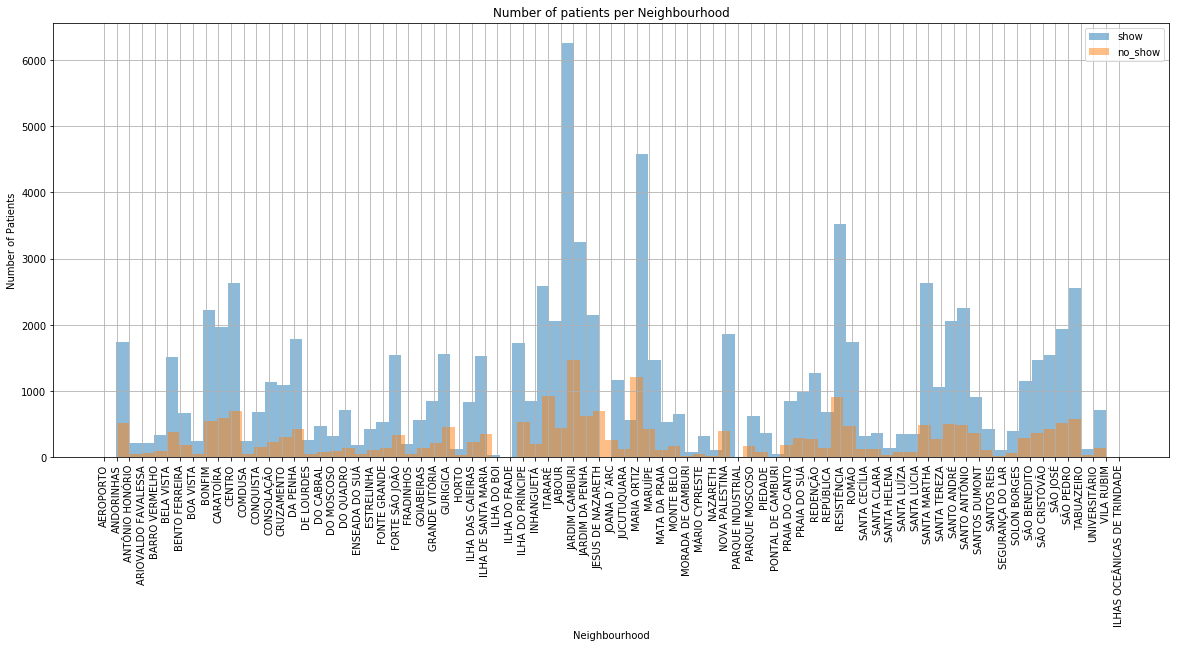

In [21]:
#getting insights by Neighbourhood
df[show].Neighbourhood.hist(figsize = [20, 8], alpha = 0.5, bins = 81, label = "show");
df[no_show].Neighbourhood.hist(figsize = [20, 8], alpha = 0.5, bins = 81, label = "no_show");
plt.legend();
plt.title("Number of patients per Neighbourhood");
plt.xlabel("Neighbourhood", );
plt.xticks(rotation=90)
plt.ylabel("Number of Patients");

Let's use proportions to discover which neighbourhood miss more appointments.

In [22]:
#getting proportions by Neighbourhood
no_show_patients = df[no_show].Neighbourhood.value_counts()
total = df.Neighbourhood.value_counts()
no_show_proportion = (no_show_patients/total)*100
no_show_proportion.sort_values()

ILHA DO BOI                      8.571429
AEROPORTO                       12.500000
MÁRIO CYPRESTE                  14.555256
SOLON BORGES                    14.712154
DE LOURDES                      15.409836
DO CABRAL                       15.714286
SANTA MARTHA                    15.841584
JARDIM DA PENHA                 16.275471
DO QUADRO                       16.489988
VILA RUBIM                      16.568743
MORADA DE CAMBURI               16.666667
MATA DA PRAIA                   17.080745
REPÚBLICA                       17.125749
CONSOLAÇÃO                      17.223837
PONTAL DE CAMBURI               17.391304
SANTO ANTÔNIO                   17.625637
REDENÇÃO                        17.707663
NOVA PALESTINA                  17.756184
JABOUR                          17.975289
SANTA LUÍZA                     17.990654
COMDUSA                         18.064516
JOANA D´ARC                     18.079888
TABUAZEIRO                      18.295019
FORTE SÃO JOÃO                  18

By the data above we can see that every patient living in PARQUE INDUSTRIAL shows in their appointments, while people living in ILHAS OCEÂNICAS DE TRINDADE missed theirs.

### Research Question 3  (The proportion of patients who received SMS)

In [23]:
#getting numbers of values on SMS columns
df[show].SMS_received.value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In [24]:
#getting numbers of values on SMS columns
df[no_show].SMS_received.value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

In [25]:
#Creating function to create an alias between columns Received_SMS X No_SHOW to create a pie chart
def f(row):
    if row['No_show'] == "No" and row['SMS_received'] == 1:
        val = "Recieved and Show"
    elif row['No_show'] == "Yes" and row['SMS_received'] == 1:
        val = "Recieved and Didn't Show"
    elif row['No_show'] == "No" and row['SMS_received'] == 0:
        val = "Didn't Recieved and Show"
    else:
        val = "Didn't Recieved and Didn't Show"
    return val

df_sms = df.apply(f, axis = 1)

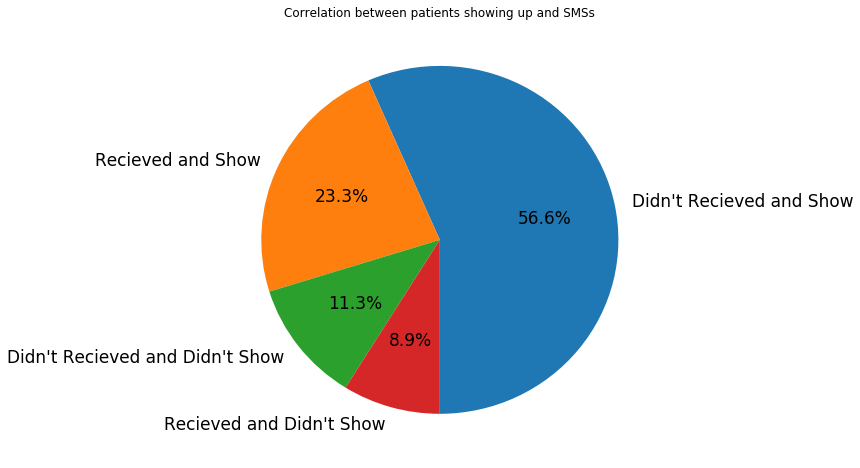

In [26]:
#Plotting pie chart
df_sms.value_counts().plot(kind="pie", figsize = [8, 8],  autopct='%1.1f%%', startangle=270, fontsize=17);
plt.title("Correlation between patients showing up and SMSs");
plt.ylabel("");
plt.xlabel("");

By looking at the graph above we can see that the proportion of people who received SMS and didn't show to the appointment are nearly 27,5% of the ones who received SMS, while people who don't receive SMS shows more on theis appointments, the proportion fot people who missed them is almost half of the ones who received SMS, being 16,6%.

### Research Question 4 (Which age are more common for each gender for people who show or don't show the appointments)

Let's discover the mean age of the genders who missed or don't theis appointments.

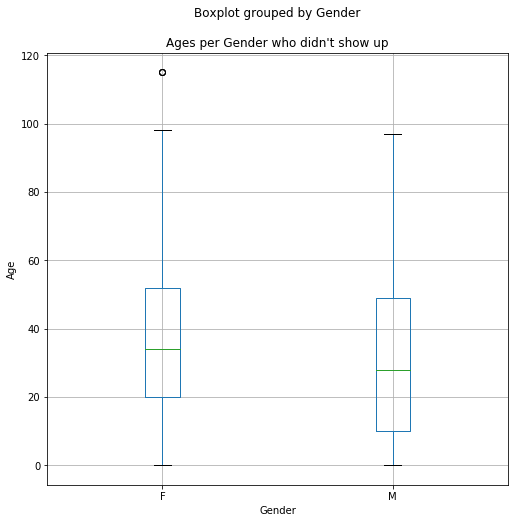

In [27]:
#Plotting boxplot agexGender for people who don't show
df[no_show].boxplot(column = 'Age', by = 'Gender',figsize = [8, 8]);
plt.title("Ages per Gender who didn't show up");
plt.ylabel("Age");
plt.xlabel("Gender");

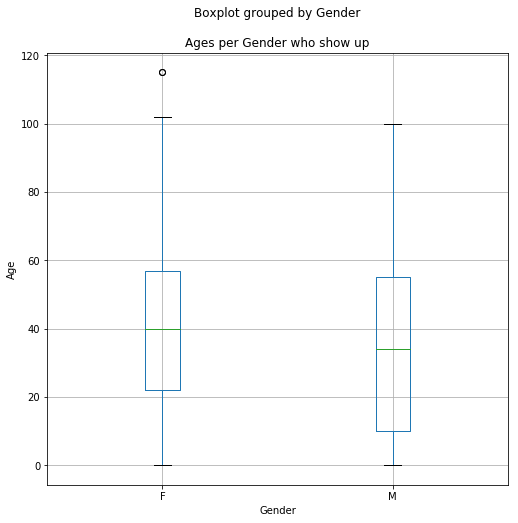

In [28]:
#Plotting boxplot agexGender for people who  show
df[show].boxplot(column = 'Age', by = 'Gender',figsize = [8, 8]);
plt.title("Ages per Gender who show up");
plt.ylabel("Age");
plt.xlabel("Gender");

By the boxplots above we can see that females miss more their appointments are younger then the ones who goes to them.
While the range for man age are much bigger than women, but there is not much difference between the ages for those who goes and who misses.

<a id='conclusions'></a>
## Conclusions

>In general aproximatly 15-20% of patients miss their appointments.
Patients in early ages and olders than 45 years are less inclined to miss their medical appointments.

>We could see that people who live in PARQUE INDUSTRIAL goes to every medical appointment, while the ones who live in ILHAS OCEÂNICAS DE TRINDADE don't show up in any.
People living in neibourhoods like ILHA DO BOI, AEROPORTO, MÁRIO CYPRESTE, SOLON BORGES, DE LOURDES, DO CABRAL tipicaly shows in theirs appointments, normaly only 13% of them missing it.

>There isn't bug difference from patients who received or not SMS and didn't show for the appoint, only 2,4%. So we can conclude that receiving SMS will not make a big difference for the patient to show for theis appointments.

>By the boxplots above we can see that females between 20-52 years are the mass of females who misses their appointments, while the ones who goes are 22 to 57.
The range for man age are much bigger than women. Being 10-55 for ones who shows up and 10 - 49 for the ones who doesn't.

> <h5>Limitations </h5>

>There are few columns in the dataset that differs a boolean, like age and neibourhood, most of the columns are booleans or have only two values, like gender. This is a limitation of our dataset making more complexes studies difficult.
